<a href="https://colab.research.google.com/github/NanditaJaiswal12/Sentiment_Analysis/blob/main/YouTube_Data_Collection_and_Sentiment_Analysis_of_video_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Install necessary libraries
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.2 MB/s eta 0:00:00


In [83]:
# Import necessary libraries
import googleapiclient.discovery
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
import emoji
from textblob.blob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import googleapiclient.discovery
import string



In [115]:
# To obtain YouTube API Key
# Go to Google Cloud Console.
# Click on the project drop-down at the top, then “New Project”.
# Enter a project name and click “Create”.
# In the Google Cloud Console, navigate to “APIs & Services” > “Library”.
# Search for “YouTube Data API v3” and click on it.
# Click “Enable”.
# Go to “APIs & Services” > “Credentials”.
# Click “+ CREATE CREDENTIALS” and select “API key”.
# Copy the generated API key.

# Replace with your YouTube API key
API_KEY = "ADD YOUR GENERATED API KEY HERE"

In [116]:
# EXAMPLE
# Click on any video from which you want to extract comments.
# Click on share option and copy the link (eg. link: https://youtu.be/gUmagAluXpk?si=jZN4sCeq4l4i5tFM)
# So video ID for this will be after .be/ and before ?si=
# Copy that video ID and paste it here.

# YouTube video ID (extract from the URL)
VIDEO_ID = "gUmagAluXpk"

In [117]:
# Replace with your own API key
API_KEY = 'ADD YOUR GENERATED API KEY HERE'
VIDEO_ID = 'gUmagAluXpk'

# Build the YouTube service object
youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=API_KEY)

def get_comments(video_id):
    comments = []
    next_page_token = None

    while True:
        # Request the comment threads
        response = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            pageToken=next_page_token,
            maxResults=100,
            textFormat='plainText'
        ).execute()

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments.append([comment['authorDisplayName'], comment['textDisplay'], comment['publishedAt'], comment['likeCount']])

        next_page_token = response.get('nextPageToken')

        if not next_page_token:
            break

    return comments

# Fetch comments
comments = get_comments(VIDEO_ID)

# Convert to DataFrame
df = pd.DataFrame(comments, columns=['Author', 'Comment', 'PublishedAt', 'Likes'])

# Save to CSV
df.to_csv('youtube_comments.csv', index=False)

print('Comments have been saved to youtube_comments.csv')


Comments have been saved to youtube_comments.csv


In [118]:
data = pd.read_csv('/content/youtube_comments.csv')

In [119]:
data

,Author,Comment,PublishedAt,Likes
0,@borismeinardus,🚀 There is so much more to explore in ML. Feel...,2024-01-15T08:55:07Z,40
1,@LaurentLaborde,"""google it"" is such a boomer thing. Now we ask...",2024-07-12T09:57:51Z,0
2,@SakibKhan-g6b,how much time take to learn ML from scratch to...,2024-07-09T14:37:49Z,0
3,@moslehuddinahmedmukit5389,The Machine Learning Specialization course tha...,2024-07-06T02:57:01Z,0
4,@andrewjenson_original,For CS undergrad students or self-taught coder...,2024-07-05T23:57:13Z,0
...,...,...,...,...
367,@flakky626,Thanks man you're great help as always!!,2023-11-27T04:09:42Z,2
368,@sankhuz,Good quality,2023-11-27T03:26:12Z,1
369,@jiaaoli4331,"Very helpful and inspirational video, love fro...",2023-11-26T23:07:12Z,5
370,@bikabob1787,nice video man keepup,2023-11-26T22:28:27Z,2


In [130]:
# import nltk
# import re
# nltk.download('stopwords')
# stemmer = nltk.SnowballStemmer("english")
# from nltk.corpus import stopwords
# stopword=set(stopwords.words('english'))


def cleanTxt(text):
    text = str(text).lower()
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", '', text)  # Remove URLs
    text = " ".join(text.split())
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove RT
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove single-character words


    # Remove emojis
    text = emoji.demojize(text)
    text = re.sub(r':[a-zA-Z_]+:', '', text)

#    text = [word for word in text.split(' ') if word not in stopword]
#    text=" ".join(text)
#    text = [stemmer.stem(word) for word in text.split(' ')]
#    text=" ".join(text)

    return text

data['Comment'] = data['Comment'].apply(cleanTxt)


In [131]:
data['Comment']

0      there   much more  explore   feel free  grab  ...
1       google   such  boomer thing now  ask   explain  
2      how much time take  learn  from scratch   pro ...
3      the machine learning specialization course tha...
4      for  undergrad students  selftaught coders int...
                             ...                        
367                  thanks man youre great help  always
368                                         good quality
369      very helpful and inspirational video love from 
370                                nice video man keepup
371                           really helpful keep  going
Name: Comment, Length: 372, dtype: object

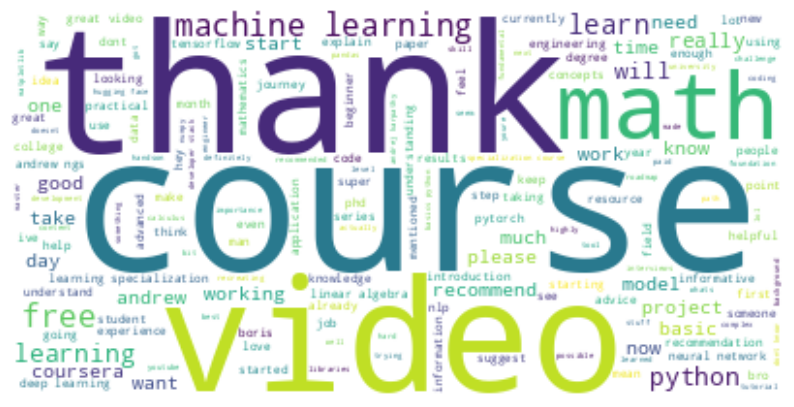

In [132]:
text = " ".join(i for i in data.Comment)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [133]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# function to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

data['Subjectivity'] = data['Comment'].apply(getSubjectivity)
data['Polarity'] = data['Comment'].apply(getPolarity)


In [134]:
data

,Author,Comment,PublishedAt,Likes,Subjectivity,Polarity,Sentiment_Analysis
0,@borismeinardus,there much more explore feel free grab ...,2024-01-15T08:55:07Z,40,0.640000,0.26,Positive
1,@LaurentLaborde,google such boomer thing now ask explain,2024-07-12T09:57:51Z,0,0.500000,0.00,Neutral
2,@SakibKhan-g6b,how much time take learn from scratch pro ...,2024-07-09T14:37:49Z,0,0.200000,0.20,Positive
3,@moslehuddinahmedmukit5389,the machine learning specialization course tha...,2024-07-06T02:57:01Z,0,0.800000,0.10,Positive
4,@andrewjenson_original,for undergrad students selftaught coders int...,2024-07-05T23:57:13Z,0,0.326667,0.14,Positive
...,...,...,...,...,...,...,...
367,@flakky626,thanks man youre great help always,2023-11-27T04:09:42Z,2,0.475000,0.50,Positive
368,@sankhuz,good quality,2023-11-27T03:26:12Z,1,0.600000,0.70,Positive
369,@jiaaoli4331,very helpful and inspirational video love from,2023-11-26T23:07:12Z,5,0.633333,0.40,Positive
370,@bikabob1787,nice video man keepup,2023-11-26T22:28:27Z,2,1.000000,0.60,Positive


In [135]:
def analyze_sentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

data['Sentiment_Analysis'] = data['Polarity'].apply(analyze_sentiment)

In [136]:
data

,Author,Comment,PublishedAt,Likes,Subjectivity,Polarity,Sentiment_Analysis
0,@borismeinardus,there much more explore feel free grab ...,2024-01-15T08:55:07Z,40,0.640000,0.26,Positive
1,@LaurentLaborde,google such boomer thing now ask explain,2024-07-12T09:57:51Z,0,0.500000,0.00,Neutral
2,@SakibKhan-g6b,how much time take learn from scratch pro ...,2024-07-09T14:37:49Z,0,0.200000,0.20,Positive
3,@moslehuddinahmedmukit5389,the machine learning specialization course tha...,2024-07-06T02:57:01Z,0,0.800000,0.10,Positive
4,@andrewjenson_original,for undergrad students selftaught coders int...,2024-07-05T23:57:13Z,0,0.326667,0.14,Positive
...,...,...,...,...,...,...,...
367,@flakky626,thanks man youre great help always,2023-11-27T04:09:42Z,2,0.475000,0.50,Positive
368,@sankhuz,good quality,2023-11-27T03:26:12Z,1,0.600000,0.70,Positive
369,@jiaaoli4331,very helpful and inspirational video love from,2023-11-26T23:07:12Z,5,0.633333,0.40,Positive
370,@bikabob1787,nice video man keepup,2023-11-26T22:28:27Z,2,1.000000,0.60,Positive


In [137]:
data['Sentiment_Analysis'].value_counts(normalize = True)*100

Sentiment_Analysis
Positive    58.870968
Neutral     27.956989
Negative    13.172043
Name: proportion, dtype: float64

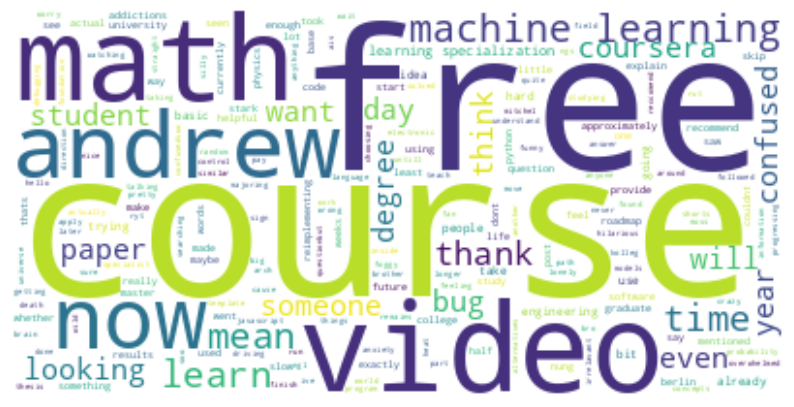

In [138]:
negative_comments = data[data['Polarity'] < 0]['Comment']

# Join the negative comments into a single string
negative_text = " ".join(comment for comment in negative_comments)

# Generate the word cloud for negative comments
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

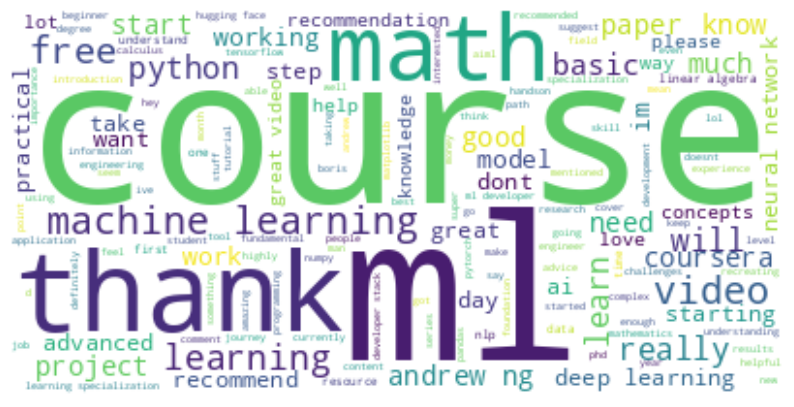

In [129]:
positive_comments = data[data['Polarity'] > 0]['Comment']

# Join the negative comments into a single string
positive_text = " ".join(comment for comment in positive_comments)

# Generate the word cloud for negative comments
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()